#**sentdex:** [playlist](https://www.youtube.com/playlist?list=PLQVvvaa0QuDcjD5BAw2DxE6OF2tius3V3)

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
"""
BATCHES!

very small batch: lot of passes to fit
moderate sized batch: less passes and easier on neurons
full samples batch: leads to overfitting

"""

inputs = np.array([[1,2,3,2.5],
                   [2.0,5.0,-1.0,2.0],
                   [-1.5,2.7,3.3,-0.8]])

weights = np.array([[0.2,0.8,-0.5,1.0],
                    [0.5,-0.91,0.26,-0.5],
                    [-0.26,-0.27,0.17,0.87]])
# shape: NxI - no. of neurons X no. of inputs

biases = [2,3,0.5]

#output = np.dot(weights, inputs) + biases 
# above will give shape error: 
# shapes (3,4) and (3,4) not aligned: 4 (dim 1) != 3 (dim 0)
# weights and inputs cant have same shape, weights are transposed!
# instead to W.I we do I.W' 
# here we get a 3x3 matrix so to add 1x3 BIAS matrix to it,
# for every row of IW' matrix we add that BIAS matrix

# soooooo
# final neural network formula with batching:

# OUTPUT = INPUT dot tr(WEIGHTS) + BIAS

output = np.dot(inputs, weights.T) + biases
print(output)


[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


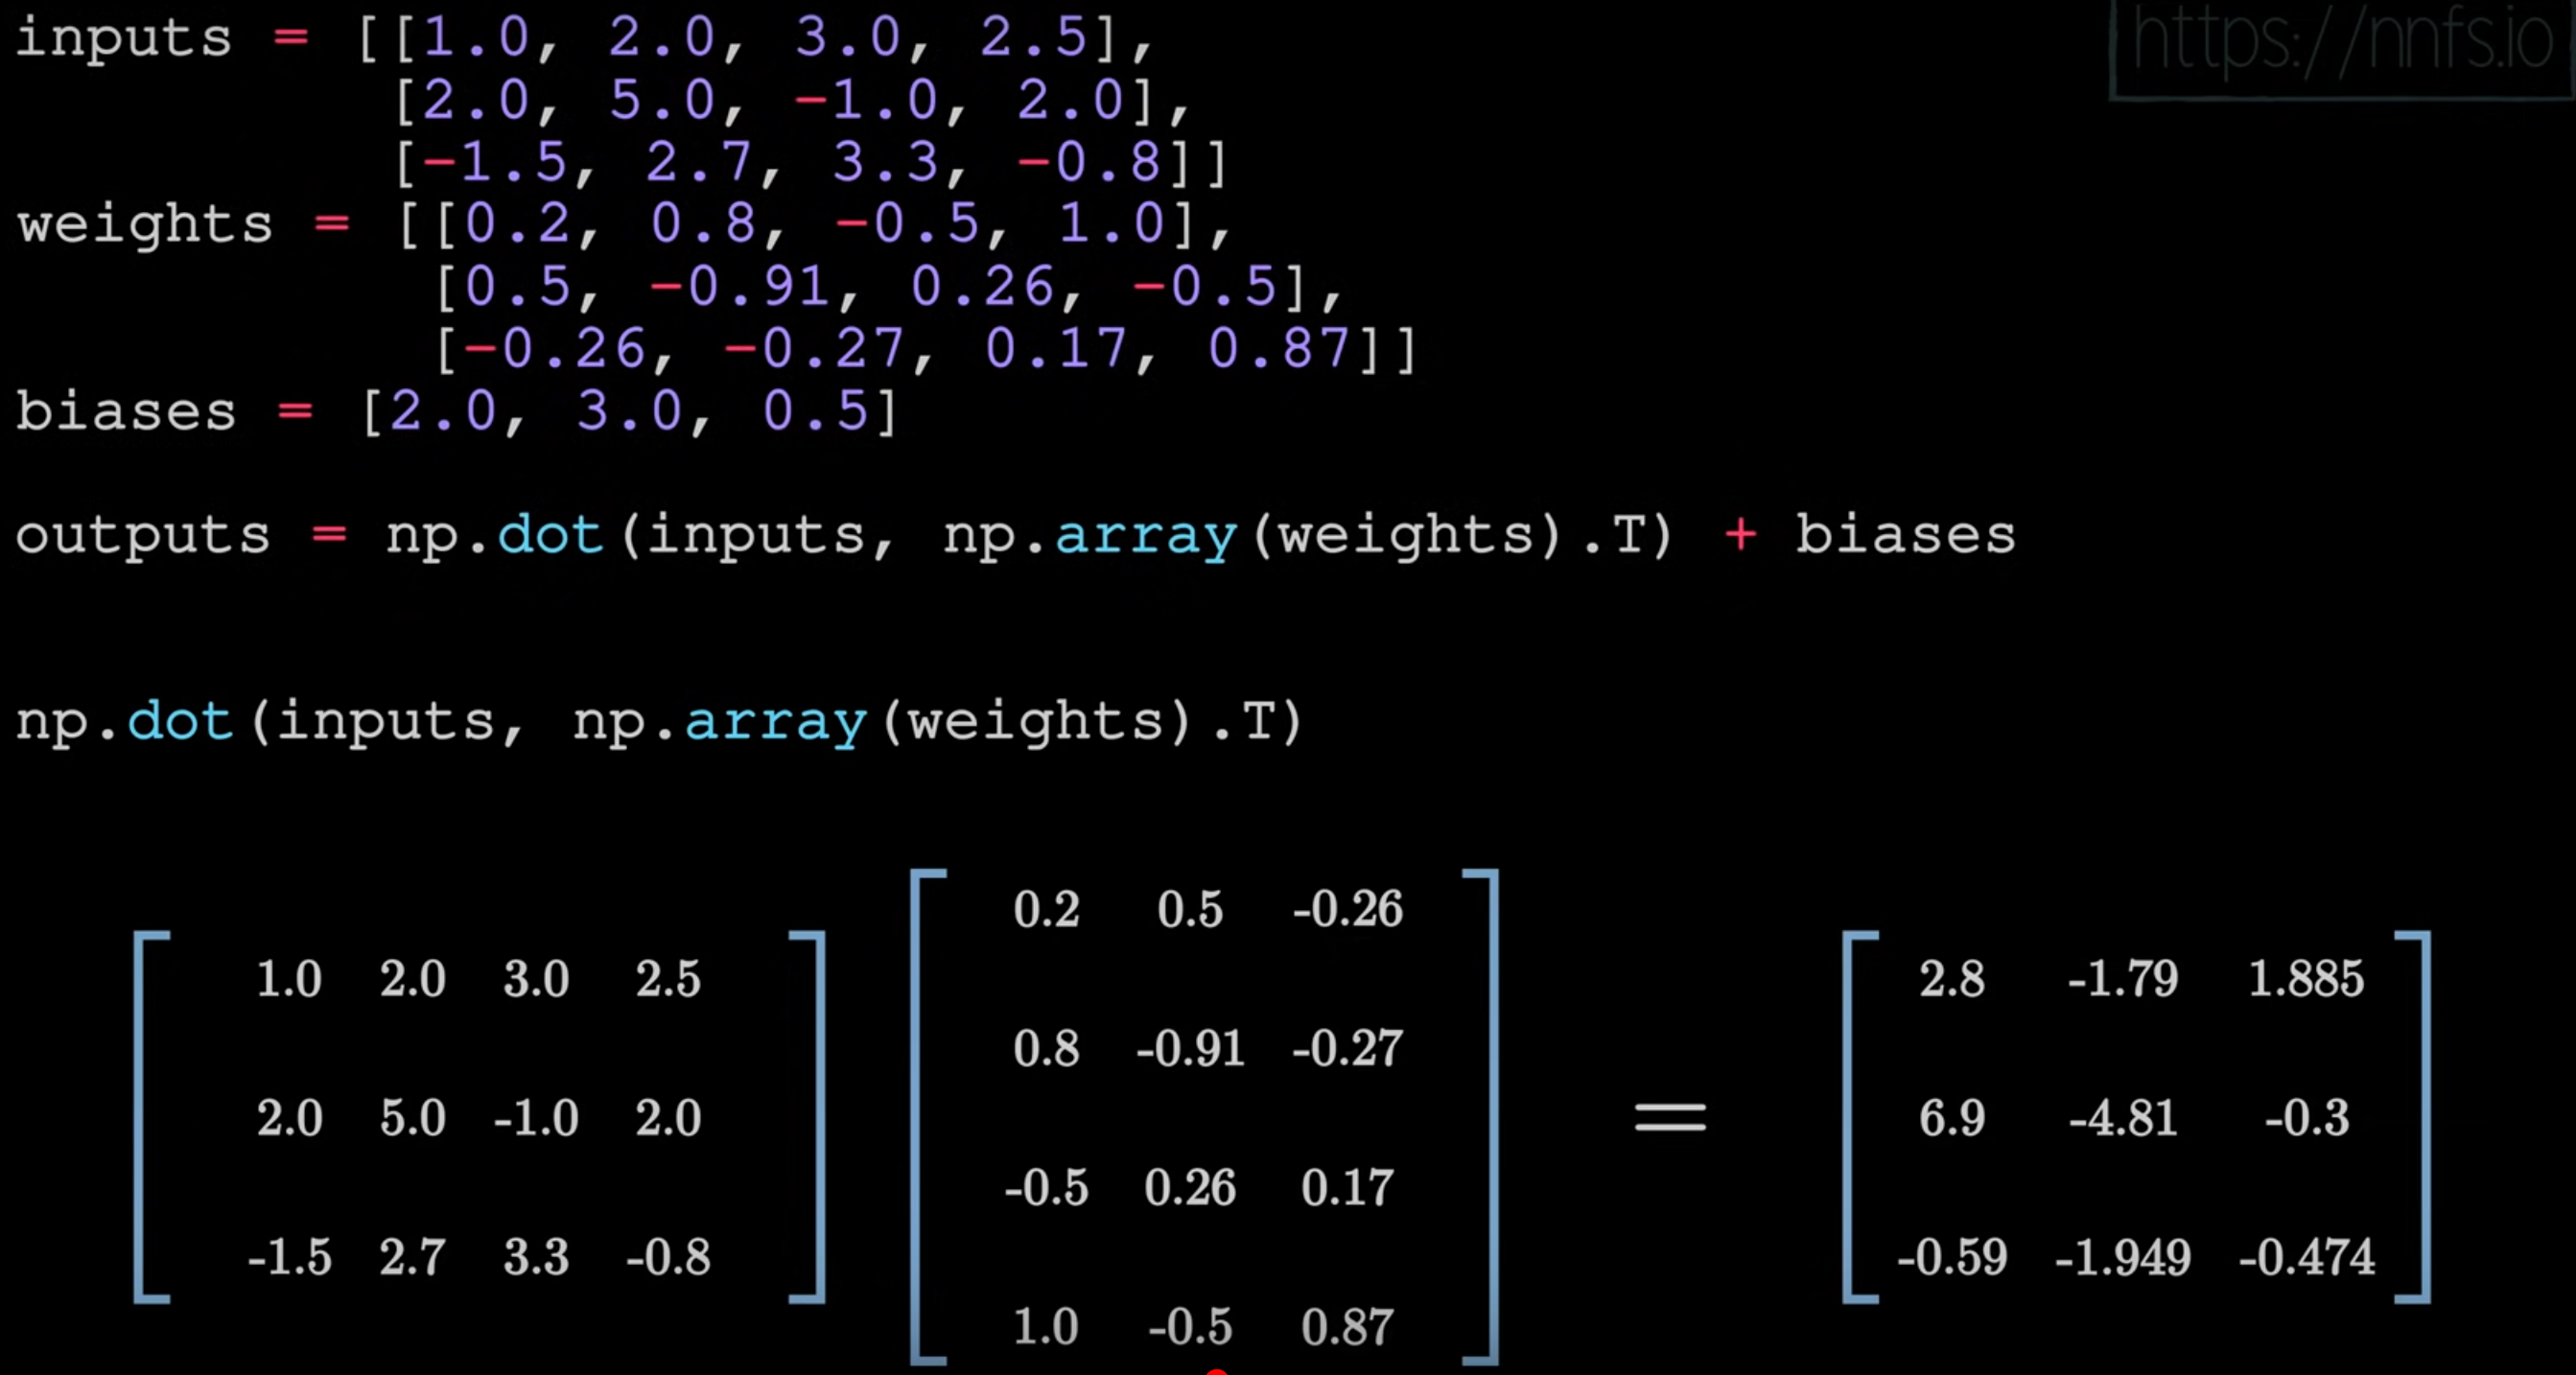

## USING OOP



In [33]:
X = np.array([[1,2,3,2.5],
              [2.0,5.0,-1.0,2.0],
              [-1.5,2.7,3.3,-0.8]])

# weights are initialized as random vals between [-1,1] in general
# NNs need small values, so normalizing and scaling is important
# biases are initialized as 0 generally but maybe other value if needed

# for reproducibility
np.random.seed(0)



# here weights is IxN, N = no. of neurons, I = no. of inputs per neuron
# previously we were transposing NxI to IxN, this removes the need to do so

class DenseLayer:


    def __init__(self, n_inputs, n_neurons):
        self.n_inputs = n_inputs
        self.n_neurons = n_neurons
        self.weights = 0.10 * np.random.randn(self.n_inputs, self.n_neurons)
        self.biases = np.zeros(shape=(1, self.n_neurons))


    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases


layer1 = DenseLayer(n_inputs=4, n_neurons=5)
layer2 = DenseLayer(n_inputs=5, n_neurons=2)

layer1.forward(X)
print("layer 1 output:\n", layer1.output)

layer2.forward(layer1.output)
print("layer 2 output:\n", layer2.output)

# shape will be 3x2 - 2 outputs per batch on input

layer 1 output:
 [[ 0.10758131  1.03983522  0.24462411  0.31821498  0.18851053]
 [-0.08349796  0.70846411  0.00293357  0.44701525  0.36360538]
 [-0.50763245  0.55688422  0.07987797 -0.34889573  0.04553042]]
layer 2 output:
 [[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


## **Activation Functions**

#### Applied after calculating I.W + B = x
#### so output will be y = Activation_Function(x)

Why activation functions??

if data is non-linear, we need a non-linear activation
to make it easy for the fit, like sigmoid/reLU
if data is linear, we need a linear activation functions

Notes:
1. Sigmoid has vanishing gradient issue

Functions:

- **Step Function**
    
    `y = 0 if x<=0 else 1`

- **Sigmoid Function**

    `y = 1/(1+e^-x)`

- **Rectified Linear Unit Function**

    `y = x if x>0 else 0`

NOTE: non-linear data always need 2 or more hidden layers for the activation functions to work :)

In [34]:
def step(x):
    return 0 if x<=0 else 1

In [35]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [36]:
def reLU(x):
    # also can be written as max(0,x)
    return x if x>0 else 0

In [37]:
# example for ReLU:

inputs = [0,2,-1,3.3,-2.7,1.1,2.2,-100]
outputs = list(map(reLU, inputs))

print(outputs)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


### Layer with activation function

In [38]:
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0,inputs)

a = Activation_ReLU()
a.forward(inputs)
print(a.output)

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [42]:
layer1 = DenseLayer(n_inputs=2, n_neurons=5) # each batch out of 500 have 2 values
activation1 = Activation_ReLU()
layer1.forward(X)
activation1.forward(layer1.output)
print(activation1.output)

[[0.         0.         0.         0.         0.        ]
 [0.00069571 0.         0.00054286 0.         0.00135406]
 [0.00107335 0.         0.00075582 0.         0.00385588]
 ...
 [0.04402612 0.         0.0285956  0.         0.21019251]
 [0.         0.         0.         0.03003847 0.29944449]
 [0.02880155 0.         0.01339711 0.         0.25232712]]


In [43]:
print(activation1.output.shape)

(300, 5)


## **SOFTMAX ACTIVATION FUNCTION**


In [44]:
layer_outputs = np.array([4.8,1.21,2.385])

# exponentiation:
exp_values = np.exp(layer_outputs)
print(exp_values)

# normalization:
normal_values = exp_values / np.sum(exp_values)
print(normal_values)
print(np.sum(normal_values))


[121.51041752   3.35348465  10.85906266]
[0.89528266 0.02470831 0.08000903]
0.9999999999999999


In [45]:
# working with batch of outputs

layer_outputs = np.array([[4.8,1.21,2.385],
                          [8.9,-1.81,0.2],
                          [1.41,1.051,0.026]])

exp_values = np.exp(layer_outputs)
# default axis: None, axis: 1 - sum of each row/batch
# keepdims: keeps the orientation same
# print(np.sum(layer_outputs, axis=1, keepdims=True))

# for normalization:
normal_values = exp_values / np.sum(exp_values, axis=1, keepdims=True)

print(normal_values, np.sum(normal_values, axis=1))

[[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99811129e-01 2.23163963e-05 1.66554348e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]] [1. 1. 1.]


## DATA 
from: [neural networks case study](https://cs231n.github.io/neural-networks-case-study/)

In [54]:
def create_spiral_data(N=100,D=2,K=3):
    # N: number of points per class
    # D: dimensionality
    # K: number of classes
    X = np.zeros((N*K,D)) # data matrix (each row = single example)
    y = np.zeros(N*K, dtype='uint8') # class labels
    for j in range(K):
        ix = range(N*j,N*(j+1))
        r = np.linspace(0.0,1,N) # radius
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    return X,y

X,y = create_spiral_data()


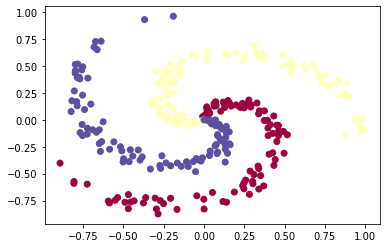

In [40]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()

In [41]:
print(X.shape, y.shape)

(300, 2) (300,)


In [46]:
class Activation_Softmax:
    
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims= True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities



In [52]:
X,y = create_spiral_data()

dense1 = DenseLayer(n_inputs=2, n_neurons=3)
activation1 = Activation_ReLU()
dense2 = DenseLayer(n_inputs=3, n_neurons=3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output.shape) # 300 batches, each 3 outputs
print(activation2.output[:5])

(300, 3)
[[0.33333333 0.33333333 0.33333333]
 [0.33334002 0.33332913 0.33333085]
 [0.33333142 0.33333712 0.33333145]
 [0.33332576 0.33334838 0.33332586]
 [0.33332864 0.33334265 0.33332871]]


just gotta train now - using loss function and backpropagation!